# Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load dataset

## 1. orders

In [4]:
orders = pd.read_csv('../dataset/orders.csv')

In [5]:
orders.ftypes

order_id                    int64:dense
user_id                     int64:dense
eval_set                   object:dense
order_number                int64:dense
order_dow                   int64:dense
order_hour_of_day           int64:dense
days_since_prior_order    float64:dense
dtype: object

In [6]:
orders.tail()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0
3421082,272231,206209,train,14,6,14,30.0


In [7]:
print
print 'total orders              : ', orders.shape[0]
print 'total users               : ', len(orders.user_id.unique())
print '# of order_number         : ', len(orders.order_number.unique())
print '# of order_day_of_week    : ', len(orders.order_dow.unique())
print '# of order_hour_of_day    : ', len(orders.order_hour_of_day.unique())
print '# of day_since_prior_order: ', len(orders.days_since_prior_order.unique())
print '='*20


total orders              :  3421083
total users               :  206209
# of order_number         :  100
# of order_day_of_week    :  7
# of order_hour_of_day    :  24
# of day_since_prior_order:  32


In [89]:
# day_since_prior_order가 32이다. 어떤 구성일까?
# 0과 NaN이 들어가 있음을 알 수 있음.
sorted(orders.days_since_prior_order.unique())

[nan,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0]

In [9]:
# nan값이 많은가?
orders.days_since_prior_order.isnull().value_counts()

False    3214874
True      206209
Name: days_since_prior_order, dtype: int64

In [11]:
temp=orders.groupby(['user_id'])['days_since_prior_order'].value_counts()

In [87]:
temp.head()

user_id  days_since_prior_order
1        14.0                      2
         0.0                       1
         15.0                      1
         19.0                      1
         20.0                      1
Name: days_since_prior_order, dtype: int64

In [13]:
temp2 = temp.reset_index(name='count')

In [14]:
days_max = temp2.sort('count', ascending=False).groupby('user_id', as_index=False).first()
del days_max['count']
days_max.columns = ['user_id', 'most_freq_days']

/Users/Glping/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [15]:
days_max.head()

,user_id,most_freq_days
0,1,14.0
1,2,8.0
2,3,7.0
3,4,30.0
4,5,10.0


In [27]:
orders_most = pd.merge(orders, days_max, on='user_id')
# del final['count']

In [86]:
orders_most.head() # NaN 값을 대처하기 위해 most_freq_days넣음
# 모두가 동일한 freq일 경우 첫번째 days를 most_freq_days로 함

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,most_freq_days
0,2539329,1,prior,1,2,8,NaN,14.0
1,2398795,1,prior,2,3,7,15.0,14.0
2,473747,1,prior,3,3,12,21.0,14.0
3,2254736,1,prior,4,4,7,29.0,14.0
4,431534,1,prior,5,4,15,28.0,14.0


In [29]:
# nan이 총 20만개
# nan값을 어떻게 처리할 것인가?
# 1. 평균값 2. 최빈도

In [30]:
# 중복된 order_id가 있는지 체크
assert len(orders_most["order_id"].unique()) == orders.shape[0]
# user_id가 중간에 안 빠져있는가 체크
assert len(orders_most["user_id"].unique()) == orders.user_id.max()

In [31]:
# ==> user_id당 order_id가 부여되는 것이 아니라 전체에 대해서 uniq하게 부여되는 것임을 알 수 있음

In [32]:
# order_number가 종류가 100가지
print orders_most.order_number.unique()

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]


In [24]:
statistics_cols = ["order_number", "order_dow", "order_hour_of_day", "days_since_prior_order"]
for col in statistics_cols:
    print col
    print orders[col].value_counts()
    print '='*20

order_number
1      206209
2      206209
3      206209
4      206209
5      182223
6      162633
7      146468
8      132618
9      120918
10     110728
11     101696
12      93881
13      86929
14      80693
15      75080
16      69889
17      65296
18      61157
19      57321
20      53931
21      50731
22      47810
23      45104
24      42499
25      40211
26      38025
27      35965
28      34057
29      32278
30      30677
        ...  
71       4235
72       4081
73       3915
74       3777
75       3615
76       3453
77       3319
78       3199
79       3072
80       2945
81       2829
82       2721
83       2602
84       2516
85       2417
86       2317
87       2224
88       2146
89       2067
90       1990
91       1905
92       1849
93       1780
94       1713
95       1656
96       1592
97       1525
98       1471
99       1421
100      1374
Name: order_number, dtype: int64
order_dow
0    600905
1    587478
2    467260
5    453368
6    448761
3    436972
4    426339
Name: 

In [25]:
# 모든 유저가 최소 4번 instacart를 이용함

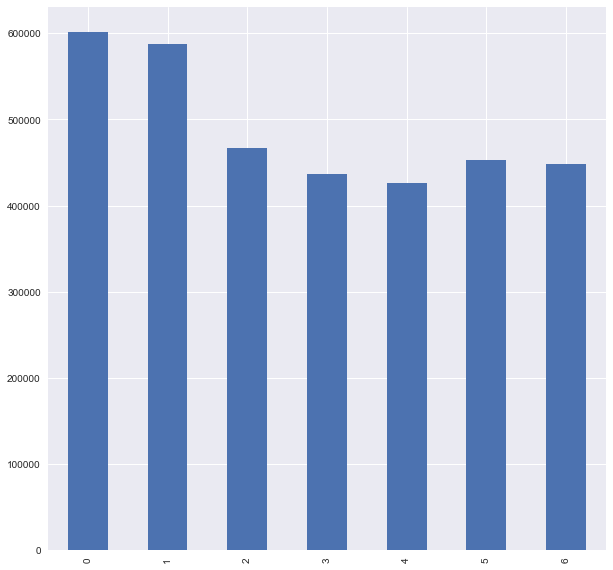

In [51]:
orders_dow = orders_most["order_dow"] \
             .value_counts(sort=False)
plt.figure(figsize=(10,10))
orders_dow.plot.bar()
plt.show()

In [38]:
orders_dow

0    600905
1    587478
2    467260
3    436972
4    426339
5    453368
6    448761
Name: order_dow, dtype: int64

In [59]:
orders_hour_count_per_dow = orders_most.groupby(['order_dow'])['order_hour_of_day'].value_counts(sort=False).reset_index(name='h_cnt')

In [60]:
# 0과 1에서 주로 이용
# Q. 요일마다의 사용시간 분포, 물품 구매 분포는 유사할까?

In [61]:
orders_hour_count_per_dow.head()

,order_dow,order_hour_of_day,h_cnt
0,0,0,3936
1,0,1,2398
2,0,2,1409
3,0,3,963
4,0,4,813


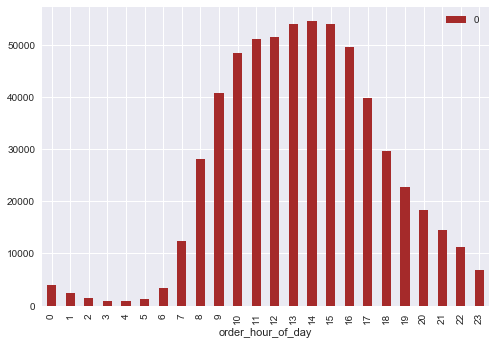

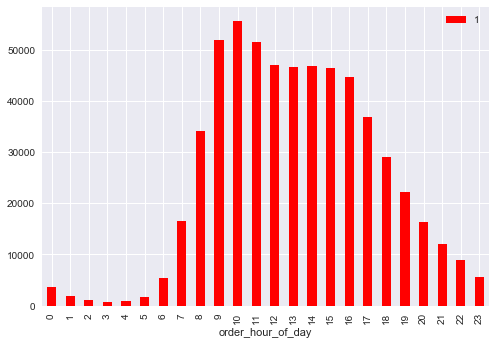

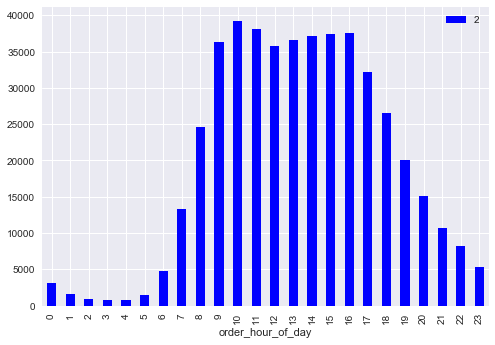

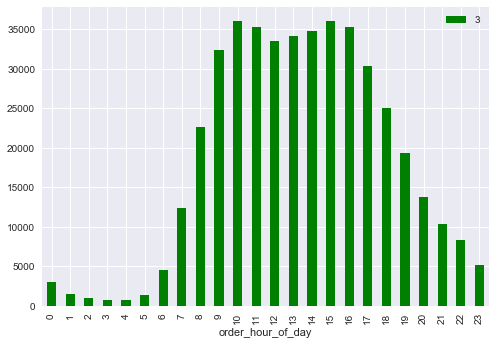

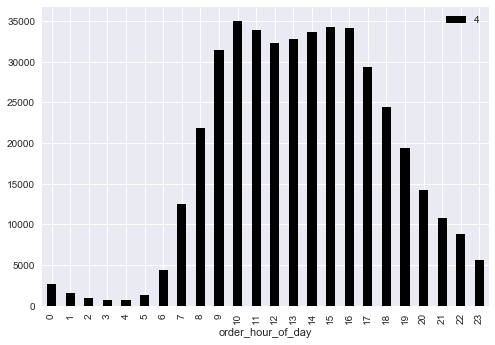

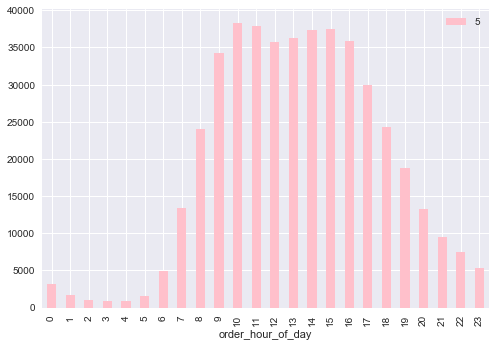

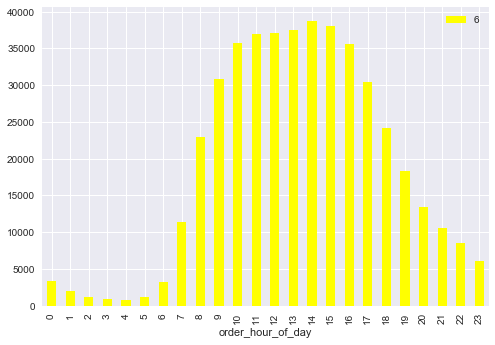

In [74]:
# fig, ax = plt.subplots()
colors = {1:'red', 2:'blue', 3:'green', 4:'black', 5:'pink', 6:'yellow', 0:'brown'}
for title, group in orders_hour_count_per_dow.groupby('order_dow'):
    group.plot(x='order_hour_of_day', y='h_cnt', label=title, kind='bar', color=colors[title])

In [76]:
# 0과 6이 비슷한 양상을 띄는 것으로 보아 토,일 이라 예상됨
# 평일은 1에서의 12-16시까지의 패턴제외, 나머지 거의 유사한 패턴을 보임
# 평균이 약간 치우쳐 있으나 정규분포를 그린다고 볼 수 있겠다.

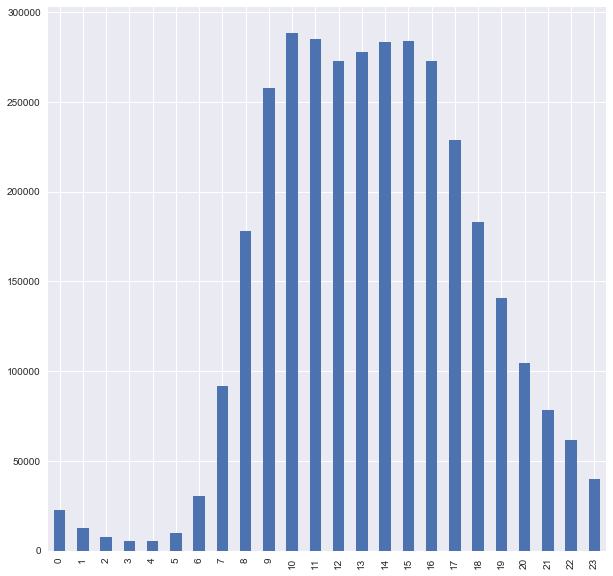

In [14]:
order_hour_of_day = orders["order_hour_of_day"] \
                    .value_counts(sort=False)
plt.figure(figsize=(10,10))
order_hour_of_day.plot.bar()
plt.show()

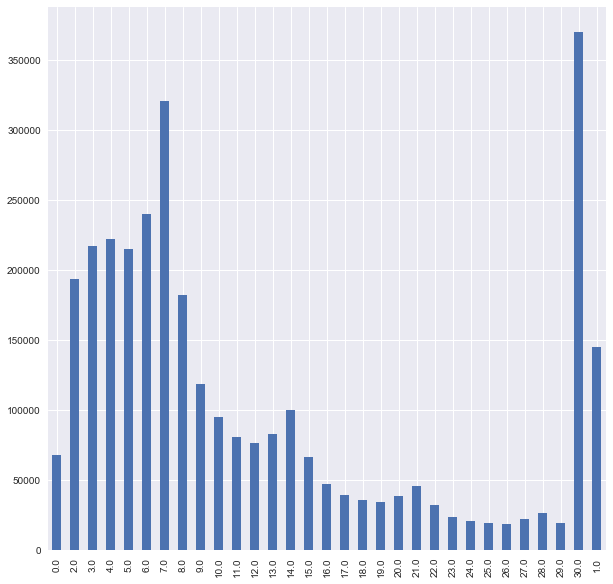

In [15]:
days_since_prior_order = orders["days_since_prior_order"] \
                         .value_counts(sort=False)
plt.figure(figsize=(10,10))
days_since_prior_order.plot.bar()
plt.show()

In [77]:
# 7과 30이 제일 크다. 정기적 배송이라고 생각되는데...
# 1. 어떤 요일에 가장 정기배송이 많을까? => 월요일과 금,혹은 토요일이 가장 많을거 같은데
# 2. 정기배송이라 생각한다면 물품의 종류를 보면 알 수 있지 않을까?

In [80]:
rel_bw_prior_dow = orders_most.groupby('days_since_prior_order')['order_dow'].value_counts(sort=False).reset_index(name='count')

In [120]:
rel_bw_prior_hod = orders_most.groupby('days_since_prior_order')['order_hour_of_day'].value_counts(sort=False).reset_index(name='count')

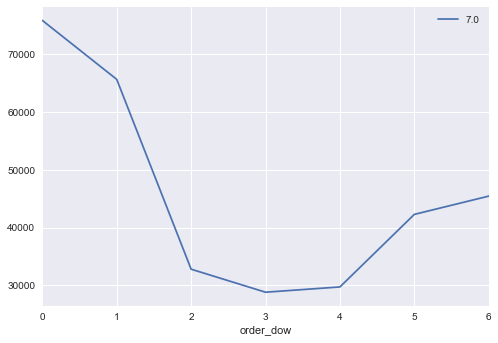

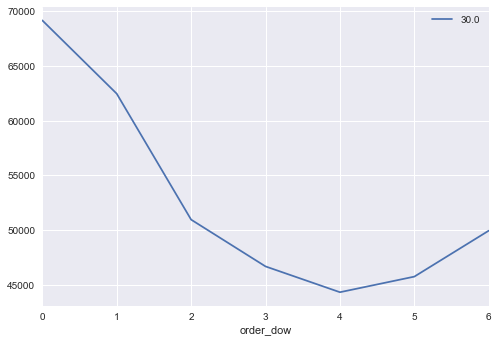

In [83]:
# fig, ax = plt.subplots()
# colors = {1:'red', 2:'blue', 3:'green', 4:'black', 5:'pink', 6:'yellow', 0:'brown'}
for title, group in rel_bw_prior_dow.groupby('days_since_prior_order'):
    if title == 7.0 or title == 30.0:
        group.plot(x='order_dow', y='count', label=title, kind='line')

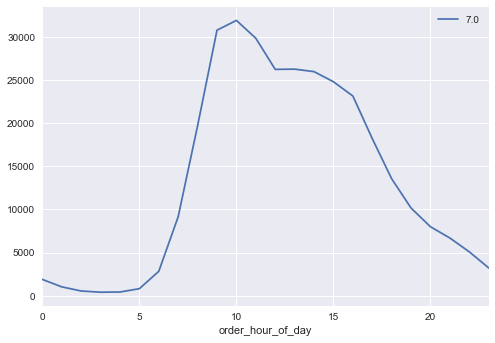

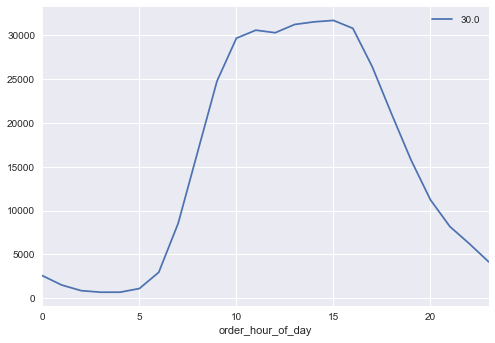

In [121]:
for title, group in rel_bw_prior_hod.groupby('days_since_prior_order'):
    if title == 7.0 or title == 30.0:
        group.plot(x='order_hour_of_day', y='count', label=title, kind='line')

In [122]:
# 정기배송으로 추정되는 날에 주로 주문한 시각을 그래프로 나타냄
# 7일의 텀이 있을 경우 오전 10시에, 30일의 텀이 있을 경우 오후 3시에 가장 많은 것으로 나타남

In [92]:
aisles = pd.read_csv('../dataset/aisles.csv')

In [93]:
aisles.ftypes

aisle_id     int64:dense
aisle       object:dense
dtype: object

In [94]:
print 'aisles: ', aisles.shape
print '=' * 20
aisles.tail()

aisles:  (134, 2)


,aisle_id,aisle
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief
133,134,specialty wines champagnes


In [95]:
departments = pd.read_csv('../dataset/departments.csv')

In [96]:
print 'dept: ', departments.shape
print '='*20
departments

dept:  (21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [97]:
products = pd.read_csv('../dataset/products.csv')

In [98]:
print 'products: ', products.shape
print '='*20
products.tail()

products:  (49688, 4)


,product_id,product_name,aisle_id,department_id
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8
49687,49688,Fresh Foaming Cleanser,73,11


## Concate tables

In [99]:
concat_pdt_dept = pd.merge(products, departments, on="department_id")

In [100]:
print 'after concat: ', concat_pdt_dept.shape
print '='*20
concat_pdt_dept.tail()

after concat:  (49688, 5)


,product_id,product_name,aisle_id,department_id,department
49683,43769,Organic Pearled Barley,68,10,bulk
49684,45682,Organic Turkish Apricots,68,10,bulk
49685,46889,Organic Brown Basmati Rice,68,10,bulk
49686,47489,Organic Brown Jasmine Rice,68,10,bulk
49687,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk


In [101]:
concat_aisle = pd.merge(concat_pdt_dept, aisles, on="aisle_id")

In [102]:
print 'after concat: ', concat_aisle.shape
print '='*20
concat_aisle.tail()

after concat:  (49688, 6)


,product_id,product_name,aisle_id,department_id,department,aisle
49683,22827,Organic Black Mission Figs,18,10,bulk,bulk dried fruits vegetables
49684,28655,Crystallized Ginger Chunks,18,10,bulk,bulk dried fruits vegetables
49685,30365,Vegetable Chips,18,10,bulk,bulk dried fruits vegetables
49686,38007,Naturally Sweet Plantain Chips,18,10,bulk,bulk dried fruits vegetables
49687,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk,bulk dried fruits vegetables


In [103]:
col_list = concat_aisle.columns.tolist()
new_cols = col_list[:3] + [col_list[-1]] + col_list[3:-1]
concat_aisle_rearr = concat_aisle[new_cols]

In [104]:
concat_aisle_rearr.tail()

,product_id,product_name,aisle_id,aisle,department_id,department
49683,22827,Organic Black Mission Figs,18,bulk dried fruits vegetables,10,bulk
49684,28655,Crystallized Ginger Chunks,18,bulk dried fruits vegetables,10,bulk
49685,30365,Vegetable Chips,18,bulk dried fruits vegetables,10,bulk
49686,38007,Naturally Sweet Plantain Chips,18,bulk dried fruits vegetables,10,bulk
49687,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,bulk dried fruits vegetables,10,bulk


In [106]:
order_products__prior = pd.read_csv('../dataset/order_products__prior.csv')

In [107]:
print 'order_products__prior: ', order_products__prior.shape
print '='*20
order_products__prior[order_products__prior.order_id == 3421083]

order_products__prior:  (32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
32434479,3421083,7854,1,0
32434480,3421083,45309,2,0
32434481,3421083,21162,3,0
32434482,3421083,18176,4,1
32434483,3421083,35211,5,0
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1
32434488,3421083,5020,10,1


In [108]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [109]:
concat_all_prior = pd.merge(order_products__prior, concat_aisle_rearr, on='product_id')

In [110]:
print 'after concat', concat_all_prior.shape
print '='*20
concat_all_prior.tail()

after concat (32434489, 9)


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,aisle,department_id,department
32434484,3265099,43492,3,0,Gourmet Burger Seasoning,104,spices seasonings,13,pantry
32434485,3361945,43492,19,0,Gourmet Burger Seasoning,104,spices seasonings,13,pantry
32434486,3267201,33097,2,0,Piquillo & Jalapeno Bruschetta,81,canned jarred vegetables,15,canned goods
32434487,3393151,38977,32,0,Original Jerky,100,missing,21,missing
32434488,3400803,23624,7,0,Flatbread Pizza All Natural,79,frozen pizza,1,frozen


In [112]:
concat_final_prior = pd.merge(concat_all_prior, orders_most, on='order_id')

In [154]:
temp_user_id3 = concat_final_prior[concat_final_prior.user_id == 3]

In [156]:
temp_user_id3.groupby(['order_id','order_dow','department','aisle'])['reordered'].agg({'sum':'sum', 'count':'count'})

count  sum
order_id order_dow department      aisle                                    
444309   3         beverages       water seltzer sparkling water      1    0
                   dairy eggs      other creams cheeses               1    0
                                   packaged cheese                    1    0
                                   soy lactosefree                    1    1
                   household       paper goods                        1    0
                   produce         fresh fruits                       1    0
                                   packaged vegetables fruits         1    1
                   snacks          crackers                           1    1
                                   nuts seeds dried fruit             1    0
521107   0         dairy eggs      soy lactosefree                    2    2
                   produce         fresh fruits                       1    1
                                   packaged vegetables fruits         2    2
676467   3         beverages       tea                                1    0
                   dairy eggs      soy lactosefree                    2    2
                   dry goods pasta instant foods                      1    1
                   produce         fresh fruits                       1    1
                   snacks          crackers                           1    1
1374495  1         dairy eggs      soy lactosefree                    2    0
                   produce         fresh fruits                       4    0
                                   packaged vegetables fruits         2    0
                   snacks          crackers                           2    0
1402502  1         beverages       water seltzer sparkling water      1    1
                   dairy eggs      soy lactosefree                    1    1
                   dry goods pasta instant foods                      1    1
                   produce         fresh fruits                       1    1
                                   packaged vegetables fruits         1    1
                   snacks          crackers                           1    1
1839752  0         dairy eggs      soy lactosefree                    1    1
                   dry goods pasta instant foods                      1    0
                   frozen          frozen breakfast                   1    1
...                                                                 ...  ...
1972919  0         snacks          crackers                           1    1
2037211  2         frozen          frozen breakfast                   1    0
                                   ice cream ice                      1    0
                   pantry          spreads                            1    0
                   produce         fresh fruits                       1    1
                   snacks          nuts seeds dried fruit             1    0
2710558  0         dairy eggs      packaged cheese                    2    0
                                   soy lactosefree                    2    2
                   deli            prepared meals                     1    1
                   frozen          ice cream ice                      1    1
                   produce         fresh fruits                       2    2
                                   fresh vegetables                   1    0
                                   packaged vegetables fruits         2    1
3002854  3         dairy eggs      soy lactosefree                    1    1
                   deli            prepared meals                     1    0
                   produce         fresh fruits                       1    1
                                   fresh vegetables                   1    0
                                   packaged vegetables fruits         1    1
                   snacks          nuts seeds dried fruit             1    0
3160850  0         dairy eggs      soy lactosefree            

In [117]:
order_7 = concat_final_prior[concat_final_prior.days_since_prior_order == 7.0]

In [118]:
order_7.tail()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,aisle,department_id,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,most_freq_days
32434212,1076519,29286,1,0,Vegetarian DHA Softgels,47,vitamins supplements,11,personal care,189937,prior,23,6,7,7.0,7.0
32434345,1875279,30793,1,0,Platinum Fresh Scent ActionPacs Dishwasher Det...,100,missing,21,missing,189409,prior,29,2,20,7.0,4.0
32434409,823347,47523,1,0,Raspberry Cheesecake,8,bakery desserts,3,bakery,15297,prior,32,5,10,7.0,1.0
32434462,2138601,9918,1,0,Apple Gripe Water,92,baby food formula,18,babies,183623,prior,11,2,13,7.0,7.0
32434476,2570526,43134,1,0,Holy Basil Leaf Vegetarian Liquid Phyto-Caps,47,vitamins supplements,11,personal care,9798,prior,30,0,9,7.0,5.0


In [138]:
order_7.user_id.unique()

array([153404,  57362,  73968, ...,  46335, 189409,  15297])

In [146]:
temp=order_7.groupby(['user_id','order_dow','order_id', 'aisle'])['reordered'].agg({'sum':'sum', 'count':'count'}).reset_index()

In [147]:
temp.head()

,user_id,order_dow,order_id,aisle,count,sum
0,3,0,1839752,fresh fruits,2,2
1,3,0,1839752,fresh vegetables,1,1
2,3,0,1839752,frozen breakfast,1,1
3,3,0,1839752,instant foods,1,0
4,3,0,1839752,packaged vegetables fruits,2,1


In [152]:
temp[temp.user_id == 3]

,user_id,order_dow,order_id,aisle,count,sum
0,3,0,1839752,fresh fruits,2,2
1,3,0,1839752,fresh vegetables,1,1
2,3,0,1839752,frozen breakfast,1,1
3,3,0,1839752,instant foods,1,0
4,3,0,1839752,packaged vegetables fruits,2,1
5,3,0,1839752,soy lactosefree,1,1
6,3,0,1839752,spreads,1,1
7,3,0,1972919,crackers,1,1
8,3,0,1972919,fresh fruits,2,2
9,3,0,1972919,fresh vegetables,2,1


In [153]:
# user_id,3의 주문 내역을 보면 fresh fruit의 경우 100% 재구매율을 보임
# 더 필요한 것! 다른 날들의 구매 내역

In [148]:
temp.columns

Index([u'user_id', u'order_dow', u'order_id', u'aisle', u'count', u'sum'], dtype='object')

In [ ]:
concat_final_prior[concat_final_prior.days_since_prior_order == 30.0]

In [64]:
# 전체 product중 11개를 제외한 모든 product에 대해 구매했던 기록이 있음
print '# of product_id without orders: ', len(products["product_id"].unique())
print '# of product_id with orders:    ', len(concat_final_prior["product_id"].unique())

 # of product_id without orders:  49688
# of product_id with orders:     49677


In [61]:
# 전체 product중 11개를 제외한 모든 product에 대해 구매했던 기록이 있음

### Hypothesis
1. Add_to_cart_order will be a positive relationship with reordered
  - 순위별 카트에 넣는 물품의 분포
  - 순위별 재구매율

In [64]:
# product id 당 reordered를 예측